# More on Pandas
Pandas contains multitudes of functions and methods that make data wrangling much easier. Lets import the example files from `Pandas.ipynb`

In [7]:
import numpy as np
import pandas as pd
#Create dataframes
dfcarbon = pd.read_excel('data/GlobalCarbonBudget2022.xlsx','Global Carbon Budget', header=0, skiprows=20)

Let's construct the `dfcarbon` dataframe as we did the other day. Below is the code we used to rename the columns using shorter names:

In [8]:
# Rename columns
name_dict = {}
for name in dfcarbon.columns:
    namelist = name.split(' ')
    name_dict[name] = ' '.join(namelist[0:2])
newdfcarbon = dfcarbon.rename(columns = name_dict)
# Create new column
newdfcarbon['total carbon'] = newdfcarbon['fossil emissions'] + newdfcarbon['land-use change'] 
newdfcarbon = newdfcarbon.iloc[:,[0,1,2,8,3,4,5,6,7]]

In [9]:
newdfcarbon

,Year,fossil emissions,land-use change,total carbon,atmospheric growth,ocean sink,land sink,cement carbonation,budget imbalance
0,1959,2.417091,1.938933,4.356024,2.03904,0.975005,0.401805,0.012684,0.927490
1,1960,2.562137,1.792600,4.354737,1.50804,0.959013,1.234131,0.013835,0.639717
2,1961,2.570540,1.666500,4.237040,1.65672,0.805321,0.839819,0.014723,0.920457
3,1962,2.661315,1.608267,4.269582,1.18944,0.895229,1.322231,0.015872,0.846810
4,1963,2.803399,1.542733,4.346133,1.21068,1.059837,0.871917,0.016867,1.186831
...,...,...,...,...,...,...,...,...,...
58,2017,9.851730,1.182300,11.034030,4.54536,2.854828,3.555004,0.202927,-0.124088
59,2018,10.050902,1.141200,11.192102,5.03388,2.947231,3.647435,0.209702,-0.646145
60,2019,10.120786,1.243800,11.364586,5.43744,2.994756,3.041949,0.214002,-0.323561
61,2020,9.624478,1.107467,10.731944,4.99140,2.998115,3.105137,0.220563,-0.583270


## Filtering
Dataframes can be sliced (indexed) using logical statements. This can be useful when filtering data based on the values within each record. You can select rows from any dataframe by using a boolean statement as an index. 

In [11]:
# boolean indexing
newdfcarbon[newdfcarbon['land-use change']>1]

,Year,fossil emissions,land-use change,total carbon,atmospheric growth,ocean sink,land sink,cement carbonation,budget imbalance
0,1959,2.417091,1.938933,4.356024,2.03904,0.975005,0.401805,0.012684,0.927490
1,1960,2.562137,1.792600,4.354737,1.50804,0.959013,1.234131,0.013835,0.639717
2,1961,2.570540,1.666500,4.237040,1.65672,0.805321,0.839819,0.014723,0.920457
3,1962,2.661315,1.608267,4.269582,1.18944,0.895229,1.322231,0.015872,0.846810
4,1963,2.803399,1.542733,4.346133,1.21068,1.059837,0.871917,0.016867,1.186831
...,...,...,...,...,...,...,...,...,...
58,2017,9.851730,1.182300,11.034030,4.54536,2.854828,3.555004,0.202927,-0.124088
59,2018,10.050902,1.141200,11.192102,5.03388,2.947231,3.647435,0.209702,-0.646145
60,2019,10.120786,1.243800,11.364586,5.43744,2.994756,3.041949,0.214002,-0.323561
61,2020,9.624478,1.107467,10.731944,4.99140,2.998115,3.105137,0.220563,-0.583270


In [12]:
sum(newdfcarbon['total carbon'][newdfcarbon.Year>2010])

121.22935305926606

In [13]:
maxcarbon = max(newdfcarbon['total carbon'])
newdfcarbon[newdfcarbon['total carbon']==maxcarbon]

,Year,fossil emissions,land-use change,total carbon,atmospheric growth,ocean sink,land sink,cement carbonation,budget imbalance
60,2019,10.120786,1.2438,11.364586,5.43744,2.994756,3.041949,0.214002,-0.323561


You can also use the `query` method to filter data based on values. However, formatting queries takes a little more thinking. Please refer to [Dataframe query](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) for formatting information

In [14]:
newdf = newdfcarbon.query('Year>2000')
newdf1 = newdfcarbon.query('`total carbon`>10 and `land-use change`>1.3')

In [16]:
newdf

,Year,fossil emissions,land-use change,total carbon,atmospheric growth,ocean sink,land sink,cement carbonation,budget imbalance
42,2001,7.005472,1.293400,8.298872,3.92940,1.818764,2.384497,0.089419,0.076792
43,2002,7.172772,1.413000,8.585772,5.03388,2.173321,0.985491,0.094101,0.298979
44,2003,7.546833,1.542800,9.089633,4.86396,2.314344,2.312349,0.101062,-0.502082
45,2004,7.815692,1.463500,9.279192,3.29220,2.274834,3.465957,0.108093,0.138108
46,2005,8.082588,1.287300,9.369888,5.24628,2.328793,1.878445,0.115475,-0.199106
47,2006,8.349650,1.384633,9.734283,3.75948,2.425367,3.114291,0.125646,0.309499
48,2007,8.599015,1.210967,9.809981,4.50288,2.364719,2.709056,0.135360,0.097966
49,2008,8.757051,1.267200,10.024251,3.78072,2.381592,3.629789,0.140051,0.092099
50,2009,8.614637,1.373833,9.988471,3.35592,2.535795,2.985733,0.147301,0.963721
51,2010,9.105990,1.320333,10.426323,5.14008,2.510948,3.321474,0.156527,-0.702706


## Filter Method
`Pandas` also contains an explicit `filter` method that allows you to pick out rows or columns of particular interest.

In [17]:
newdfcarbon.filter(items = ["Year","total carbon","fossil emissions", "land-use change"])

,Year,total carbon,fossil emissions,land-use change
0,1959,4.356024,2.417091,1.938933
1,1960,4.354737,2.562137,1.792600
2,1961,4.237040,2.570540,1.666500
3,1962,4.269582,2.661315,1.608267
4,1963,4.346133,2.803399,1.542733
...,...,...,...,...
58,2017,11.034030,9.851730,1.182300
59,2018,11.192102,10.050902,1.141200
60,2019,11.364586,10.120786,1.243800
61,2020,10.731944,9.624478,1.107467


# Exploration
Let's try to use some of the `pandas` functionality to explore the exoplanet data in our file `Exoplanet_Archive2.2024.csv`

In [2]:
#create exoplanet dataframe
dfplanets = pd.read_csv('data/Exoplanet_Archive2.2024.csv', header=0,  skiprows=96)

In [18]:
dfplanets.columns

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

In [21]:
dfplanets.filter(items = ["pl_name","default_flag"], axis=1)

,pl_name,default_flag
0,11 Com b,0
1,11 Com b,0
2,11 Com b,1
3,11 UMi b,1
4,11 UMi b,0
...,...,...
35205,ups And d,0
35206,ups Leo b,1
35207,xi Aql b,0
35208,xi Aql b,0


In [22]:
dfplanets = dfplanets[dfplanets.default_flag==1]
#setting index - not strictly needed
dfplanets.set_index("pl_name")

,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
pl_name,,,,,,,,,,,,,,,,,,,,,
11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,<a refstr=TENG_ET_AL__2023 href=https://ui.ads...,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,9/19/2023,2023-08,9/19/2023
11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,9/4/2018,2017-03,9/6/2018
14 And b,14 And,1,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,<a refstr=TENG_ET_AL__2023 href=https://ui.ads...,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,9/19/2023,2023-08,9/19/2023
14 Her b,14 Her,1,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,<a refstr=FENG_ET_AL__2022 href=https://ui.ads...,...,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,6/12/2023,2022-09,6/12/2023
16 Cyg B b,16 Cyg B,1,3,1,Radial Velocity,1996,Multiple Observatories,Published Confirmed,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,...,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603,9/4/2018,2017-03,9/6/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ups And b,ups And,1,2,3,Radial Velocity,1996,Lick Observatory,Published Confirmed,0,<a refstr=CURIEL_ET_AL__2011 href=https://ui.a...,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,1/28/2019,2011-01,1/31/2019
ups And c,ups And,1,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,<a refstr=CURIEL_ET_AL__2011 href=https://ui.a...,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,1/28/2019,2011-01,1/31/2019
ups And d,ups And,1,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,<a refstr=CURIEL_ET_AL__2011 href=https://ui.a...,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,1/28/2019,2011-01,1/31/2019


In [26]:
sum(dfplanets['sy_pnum']>3)

507

In [27]:
import statistics as st
Kratio = 7.496*10**(-6)
ratio = dfplanets.pl_orbsmax**3/dfplanets.pl_orbper**2

In [28]:
ratio

2        0.000016
3        0.000013
6        0.000013
11       0.000007
22       0.000007
           ...   
35191    0.000010
35198    0.000010
35203    0.000010
35206    0.000011
35209    0.000013
Length: 5573, dtype: float64

In [29]:
ratio/Kratio

2        2.087549
3        1.792979
6        1.780360
11       0.914074
22       0.957073
           ...   
35191    1.299851
35198    1.299997
35203    1.299822
35206    1.477216
35209    1.736039
Length: 5573, dtype: float64

In [33]:
len(dfplanets.st_mass)

5573

In [32]:
len(dfplanets.st_mass[dfplanets.sy_snum==1])

5066

In [6]:
sum(dfplanets.pl_orbsmax<0.5)

16832

<Axes: >

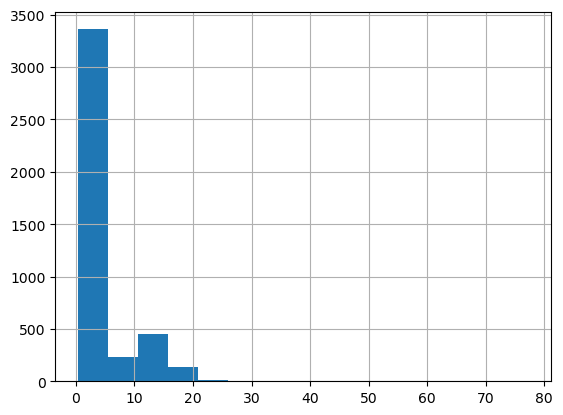

In [37]:
dfplanets.pl_rade.hist(bins=15)